In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [72]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [38]:
df_cyber = pd.read_csv('china_cyber.csv', parse_dates=True, index_col='Date')

In [39]:
df_cyber.head()

,status,infected_computers,defaced_websites,defaced_gov,backdoor_websites,backdoor_gov,phishing_webites,new_vulnerabilities,high_risk
Date,,,,,,,,,
2019-01-06,Good,0.200,669.0,52.0,553,10,2924.0,138.0,44.0
2019-01-13,Good,0.190,690.0,41.0,805,17,3634.0,225.0,68.0
2019-01-20,Good,0.210,638.0,43.0,561,9,1718.0,375.0,110.0
2019-01-27,Good,0.240,70.0,42.0,600,3,1260.0,177.0,65.0
2019-02-03,Excellent,0.233,618.0,34.0,424,5,320.0,205.0,51.0


In [40]:
df_cyber['status'].astype('category').head()

Date
2019-01-06         Good
2019-01-13         Good
2019-01-20         Good
2019-01-27         Good
2019-02-03    Excellent
Name: status, dtype: category
Categories (3, object): [Excellent, Fair, Good]

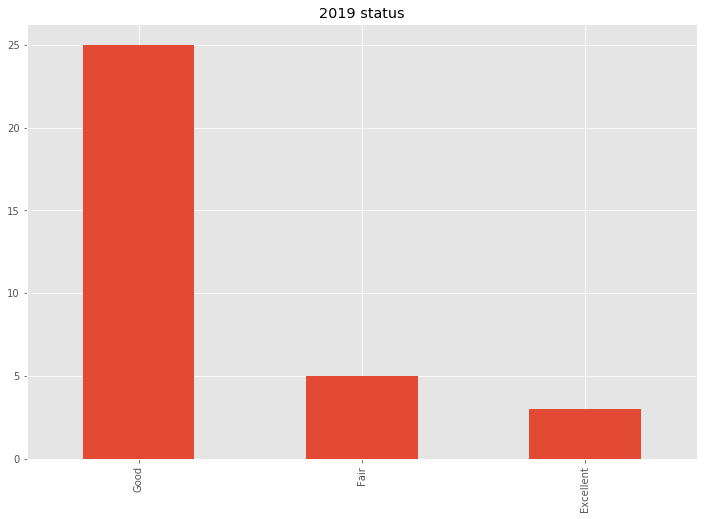

In [73]:
_ = df_cyber['status'].value_counts().plot(kind='bar')
_ = plt.title('2019 status')

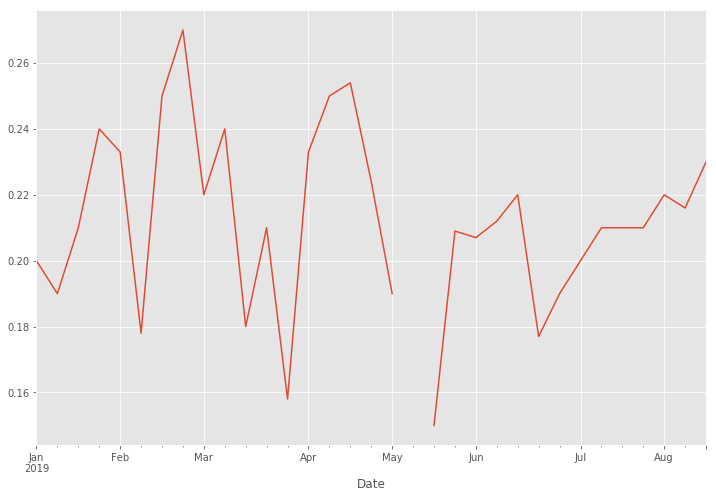

In [74]:
_ = df_cyber['infected_computers'].plot()

In [52]:
def plot_metric(column, kind):
    df_cyber[column].plot(kind=kind)
    plt.title(str(column))

In [44]:
df_cyber.columns

Index(['status', 'infected_computers', 'defaced_websites', 'defaced_gov',
       'backdoor_websites', 'backdoor_gov', 'phishing_webites',
       'new_vulnerabilities', 'high_risk'],
      dtype='object')

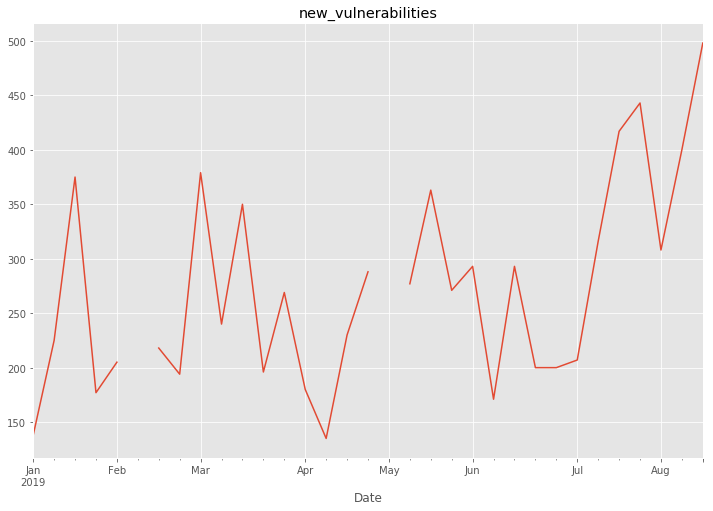

In [75]:
plot_metric('new_vulnerabilities', 'line')

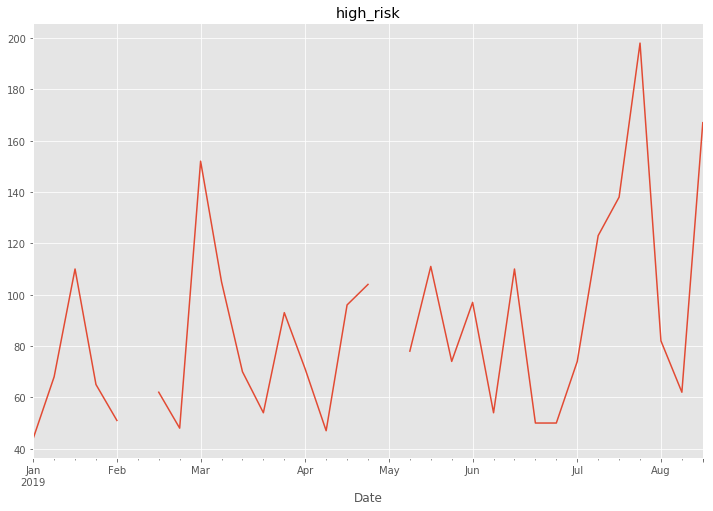

In [76]:
plot_metric('high_risk', 'line')

In [48]:
df_cyber['status_color'] = df_cyber.status.map({'Good': 'blue', 'Fair': 'orange', 'Excellent': 'green'})

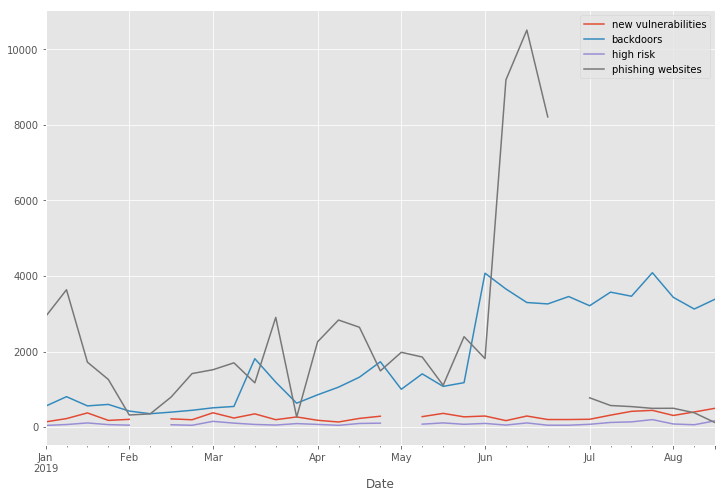

In [78]:
ax = df_cyber['new_vulnerabilities'].plot(label='new vulnerabilities')
_ = df_cyber['backdoor_websites'].plot(ax=ax, label='backdoors')
_ = df_cyber['high_risk'].plot(ax=ax, label='high risk')
_ = df_cyber['phishing_webites'].plot(ax=ax, label='phishing websites')
_ = plt.legend()